# Importaciones de bibilotecas

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import scipy as sp

# Generar un cvs simulado de amazon y sus ventas en su AMAZON DAYS 📁

In [42]:
# Generar fechas del mes de julio
fechas = pd.date_range(start='2024-07-01', end='2024-07-31')

# Simular ventas base (normal con algo de ruido)
np.random.seed(42)
ventas = np.random.normal(loc=100, scale=15, size=len(fechas))

# Marcar Prime Day (16 y 17 de julio)
es_prime_day = fechas.isin(['2024-07-16', '2024-07-17']).astype(int)

# Aumentar ventas artificialmente en Prime Day
ventas += es_prime_day * np.random.normal(loc=60, scale=10, size=len(fechas))

df = pd.DataFrame({'fecha': fechas, 'ventas': ventas, 'es_prime_day': es_prime_day})

#guardar el DataFrame en un archivo CSV
df.to_csv('ventas_julio.csv', index=False)


/var/folders/cc/f3kjh4c13ws4rgqrwyqr5sgh0000gn/T/ipykernel_47709/2061499067.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  es_prime_day = fechas.isin(['2024-07-16', '2024-07-17']).astype(int)


## Analisis exploratorio 🔍

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         31 non-null     datetime64[ns]
 1   ventas        31 non-null     float64       
 2   es_prime_day  31 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 876.0 bytes


tenemos que hay 31 filas en 3 columans repartidas en "fecha", "ventas" y "es_prime_day" repartidas a las ventas del mes

In [19]:
df['fecha'] = pd.to_datetime(df['fecha'])

convertimos lqa columna "fecha" para un mejor analisis y representacion visual futura

## ¿Hay una fecha con mayor venta? 📅📈

In [23]:
fechas_con_mayor_venta = df.loc[df['ventas'] == df['ventas'].max(), 'fecha'].values[0]
mayor_venta_07_17 = df.loc[df['fecha'] == '2024-07-17', 'ventas'].values[0]
### unir ambas variables
resultado = f"Fecha con mayor venta: {fechas_con_mayor_venta}, Ventas el 17 de julio: {mayor_venta_07_17}"
print(resultado)

Fecha con mayor venta: 2024-07-17T00:00:00.000000000, Ventas el 17 de julio: 155.37875545717282


la mayor venta fue el dia 17 de julio con un maximo de $155.37 millones



## ¿Que dia fue el mas bajo en ventas? 📉

In [33]:
dia_mas_bajo = df.loc[df['ventas'] == df['ventas'].min(), 'fecha'].values[0]
dinero_mas_bajo = df.loc[df['ventas'] == df['ventas'].min(), 'ventas'].values[0]
resultado_bajo = f"Fecha con menor venta: {dia_mas_bajo}, Ventas: {dinero_mas_bajo}"
print(resultado_bajo)

Fecha con menor venta: 2024-07-14T00:00:00.000000000, Ventas: 71.30079633013302


el dia con menor flujo fue de $71.30 millones el dia 14 de julio

## ¿Esto fue con amazon days? 📦

In [25]:
amazon_days_17 = df.loc[df['fecha'] == '2024-07-17', 'es_prime_day'].values[0]
print(f"¿Es Prime Day el 17 de julio? {'Sí' if amazon_days_17 else 'No'}")

¿Es Prime Day el 17 de julio? Sí


## ¿Cuantos dias de amazon days fueron y cuanto se recaudo en eso? 🧮

In [26]:
dias_totales_amazon_days = df['es_prime_day'].sum()
print(f"Días totales de Prime Day: {dias_totales_amazon_days}")

Días totales de Prime Day: 2


In [27]:
recaudacion_total_amazon_days = df.loc[df['es_prime_day'] == 1, 'ventas'].sum()
print(f"Recaudación total en Prime Day: {recaudacion_total_amazon_days}")

Recaudación total en Prime Day: 302.33805480896035


fueron 2 dias de amazon days de los cuales por ambos dias se recaudo 302.33$ millones

## ¿Pero fue mayor que la el resto de 29 dias restantes del mes? 🧩

In [28]:
ventas_no_amazon_days = df.loc[df['es_prime_day'] == 0, 'ventas'].sum()
print(f"Ventas fuera de Prime Day: {ventas_no_amazon_days}")

Ventas fuera de Prime Day: 2829.9350774272225


In [29]:
ventas_totales = df['ventas'].sum()
print(f"Ventas totales en julio: {ventas_totales}")

Ventas totales en julio: 3132.273132236183


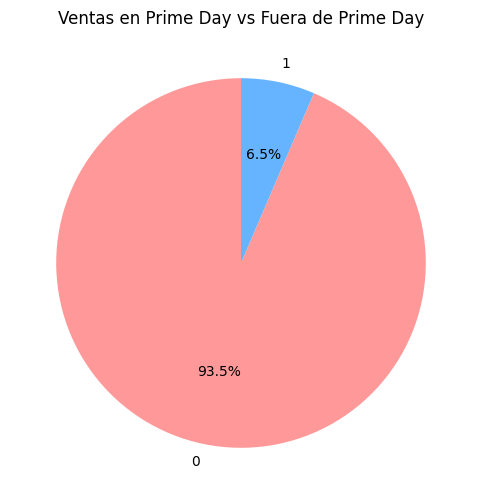

In [36]:
## pie chart de ventas en Prime Day vs fuera de Prime Day
plt.figure(figsize=(8, 6))
df['es_prime_day'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Ventas en Prime Day vs Fuera de Prime Day')
plt.ylabel('')
plt.show()


entonces tenemos hasta ahora

· $2,829.93 millones de ventas fueron fuera de "amazon days"

· $302.33 millones de ventas fueron en los dias de "amazon days"

representan porcentual

· 93.5% de las ventas totales

· 6.5% de las ventas totles

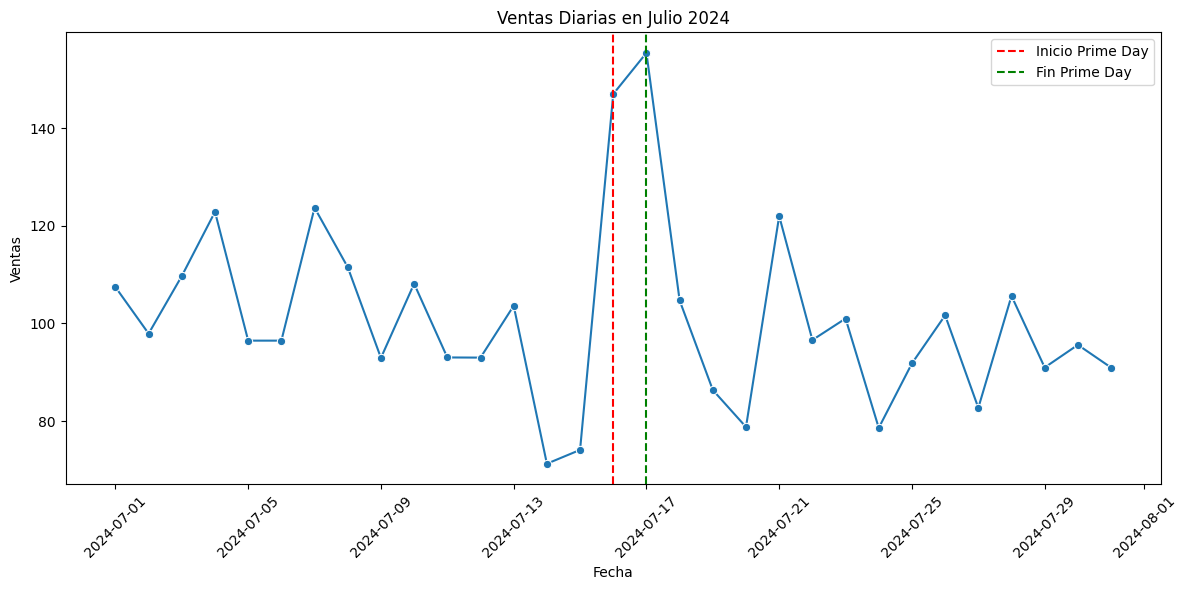

In [37]:
## linea de tiempo de ventas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='fecha', y='ventas', marker='o')
plt.axvline(pd.Timestamp('2024-07-16'), color='red', linestyle='--', label='Inicio Prime Day')
plt.axvline(pd.Timestamp('2024-07-17'), color='green', linestyle='--', label='Fin Prime Day')
plt.title('Ventas Diarias en Julio 2024')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

tenemos un dato muy interesante un dia antes del inicio del prime day hubo un pico de mas 98.26% de ventas

Ventas el 15 de julio: 74.12623251230451

Ventas el 16 de julio: 146.95929935178754

acabando el dia 17 hubo una caida en los 3 dias posteriores de 49.28% de ventas

Ventas el 17 de julio: 155.37875545717282

Ventas el 18 de julio: 104.71370998892911

Ventas el 19 de julio: 86.37963886718184

Ventas el 20 de julio: 78.81544447997062

# Hipotesis 🧪

In [53]:
#prueba t si las ventas en Prime Day son significativamente diferentes a las ventas fuera de Prime Day
p_value = 0.05
ventas_prime = df.loc[df['es_prime_day'] == 1, 'ventas']
ventas_no_prime = df.loc[df['es_prime_day'] == 0, 'ventas']
t_stat, p_value = sp.stats.ttest_ind(ventas_prime, ventas_no_prime)
print(f"Estadístico t: {t_stat}, Valor p: {p_value}")

Estadístico t: 5.489499965151462, Valor p: 6.51372933456927e-06


no hay difencia significativa para que las ventas en Prime Day son significativamente diferentes a las ventas fuera de Prime Day

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           6.51e-06
Time:                        23:44:41   Log-Likelihood:                -123.29
No. Observations:                  31   AIC:                             250.6
Df Residuals:                      29   BIC:                             253.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           97.5840      2.479     39.358   

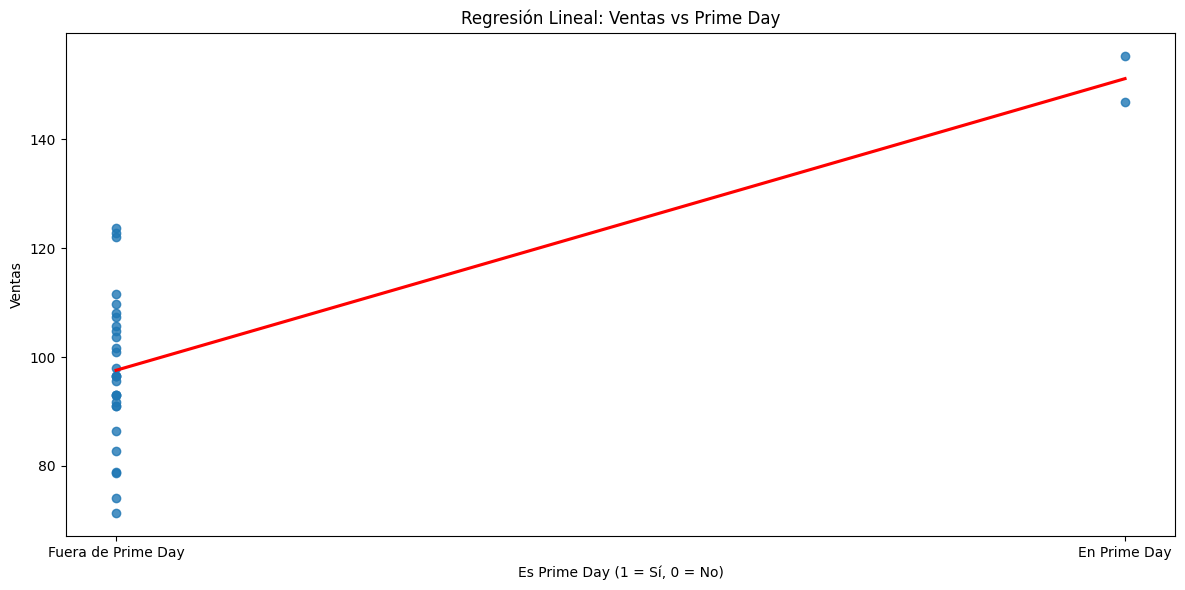

In [55]:
## regresion lineal
X = df[['es_prime_day']]
y = df['ventas']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())
# Gráfico de regresión lineal
plt.figure(figsize=(12, 6))
sns.regplot(x='es_prime_day', y='ventas', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Regresión Lineal: Ventas vs Prime Day')
plt.xlabel('Es Prime Day (1 = Sí, 0 = No)')
plt.ylabel('Ventas')
plt.xticks([0, 1], ['Fuera de Prime Day', 'En Prime Day'])
plt.tight_layout()
plt.show()